## Analisis Value at Risk metode Historis pada 5 Saham Big Banks di Pasar Modal Indonesia

1. Bank Central Asia, Tbk. (BBCA)
2. Bank Rakyat Indonesia, Tbk. (BBRI)
3. Bank Mandiri, Tbk. (BMRI)
3. Bank Negara Indonesia, Tbk. (BBNI)

In [32]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [33]:
df = pd.read_csv('5 Big Banks in Indonesia.csv')
df.head()

,Date,BBCA,BBRI,BMRI,BBNI
0,23/2/2024,9825,6125,7050,5900
1,22/2/2024,9875,6250,7100,5950
2,21/2/2024,9975,6300,7250,6000
3,20/2/2024,10025,6300,7150,6025
4,19/2/2024,9875,6100,7150,5875


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2200 non-null   object
 1   BBCA    2200 non-null   int64 
 2   BBRI    2200 non-null   int64 
 3   BMRI    2200 non-null   int64 
 4   BBNI    2200 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 86.1+ KB


In [36]:
# Ubah kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,BBCA,BBRI,BMRI,BBNI
0,2024-02-23,9825,6125,7050,5900
1,2024-02-22,9875,6250,7100,5950
2,2024-02-21,9975,6300,7250,6000
3,2024-02-20,10025,6300,7150,6025
4,2024-02-19,9875,6100,7150,5875


### Mencari nilai Return harian masing-masing saham

In [41]:
import pandas as pd
import numpy as np

# Melakukan perhitungan log return untuk setiap saham
log_returns = np.log(df.iloc[:, 1:] / df.iloc[:, 1:].shift(1))

# Menghapus baris yang memiliki nilai NaN (biasanya baris pertama karena perhitungan menggunakan shift)
log_returns = log_returns.dropna()

# Tambahkan kolom date
log_returns['Date'] = df['Date'][0:].reset_index(drop=True)
log_returns = log_returns[['BBCA', 'BBRI', 'BMRI', 'BBNI']]

# Mencetak log return
print(log_returns)

          BBCA      BBRI      BMRI      BBNI
1     0.005076  0.020203  0.007067  0.008439
2     0.010076  0.007968  0.020907  0.008368
3     0.005000  0.000000 -0.013889  0.004158
4    -0.015076 -0.032261  0.000000 -0.025211
5     0.007566  0.008163  0.006969  0.021053
...        ...       ...       ...       ...
2195 -0.010850 -0.004283 -0.010292  0.011834
2196  0.003630  0.000000  0.006873  0.008785
2197 -0.007273  0.000000 -0.031307 -0.029588
2198  0.000000  0.004283 -0.007092 -0.033591
2199  0.014493  0.004264  0.007092  0.009274

[2199 rows x 4 columns]


### Membuat Portofolio dengan bobot sama, yaitu sebesar 25% dari modal

In [42]:
portfolio_value = 100000000 # Rp 100 juta
weights = np.array([1/4]*4)
print(weights)

[0.25 0.25 0.25 0.25]


### Menghitung return dari Portofolio yang telah dibuat

In [44]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

1       0.010196
2       0.011830
3      -0.001183
4      -0.018137
5       0.010938
          ...   
2195   -0.003397
2196    0.004822
2197   -0.017042
2198   -0.009100
2199    0.008781
Length: 2199, dtype: float64


### Rata-rata return dari Portofolio menyimpan saham selama 20 hari

In [46]:
days = 20

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

20     -0.065060
21     -0.066772
22     -0.077695
23     -0.075119
24     -0.053967
          ...   
2195   -0.034855
2196   -0.037495
2197   -0.048948
2198   -0.073348
2199   -0.049399
Length: 2180, dtype: float64


### Menerapkan analisis Value at Risk metode Historis dengan tingkat kepercayaan 90%, 95%, dan 99% periode 20 hari

#### tingkat kepercayaan 90%

In [52]:
confidence_interval = 0.90

VaR_90 = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR_90)

7677455.236267088


#### tingkat kepercayaan 95%

In [53]:
confidence_interval = 0.95

VaR_95 = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR_95)

10474529.234457104


#### tingkat kepercayaan 99%

In [54]:
confidence_interval = 0.99

VaR_99 = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR_99)

18752323.61617184


In [59]:
print('Ringkasan:')
print('')
print('-----------------------------------------------------------')
print('Nilai VaR untuk Tingkat Kepercayaan 90%: {}'.format(VaR_90))
print('-----------------------------------------------------------')
print('Nilai VaR untuk Tingkat Kepercayaan 95%: {}'.format(VaR_95))
print('-----------------------------------------------------------')
print('Nilai VaR untuk Tingkat Kepercayaan 99%: {}'.format(VaR_99))
print('-----------------------------------------------------------')

Ringkasan:

-----------------------------------------------------------
Nilai VaR untuk Tingkat Kepercayaan 90%: 7677455.236267088
-----------------------------------------------------------
Nilai VaR untuk Tingkat Kepercayaan 95%: 10474529.234457104
-----------------------------------------------------------
Nilai VaR untuk Tingkat Kepercayaan 99%: 18752323.61617184
-----------------------------------------------------------


Nilai VaR adalah ukuran risiko yang mengindikasikan kerugian maksimum yang diharapkan pada suatu investasi atau portofolio pada suatu interval kepercayaan tertentu. Dalam kasus ini, kita menggunakan interval kepercayaan 90%, 95%, dan 99%.

1. Untuk interval kepercayaan 90%, nilai VaR adalah sekitar 7.68 juta. Ini berarti dengan tingkat kepercayaan 90%, kerugian maksimum yang diharapkan dalam 20 hari adalah sekitar 7.68 juta.
2. Untuk interval kepercayaan 95%, nilai VaR adalah sekitar 10.47 juta. Ini berarti dengan tingkat kepercayaan 95%, kerugian maksimum yang diharapkan dalam 20 hari adalah sekitar 10.47 juta.
3. Untuk interval kepercayaan 99%, nilai VaR adalah sekitar 18.75 juta. Ini berarti dengan tingkat kepercayaan 99%, kerugian maksimum yang diharapkan dalam 20 hari adalah sekitar 18.75 juta.

Data rata-rata return portofolio selama 20 hari telah digunakan untuk menghitung nilai-nilai VaR tersebut. 

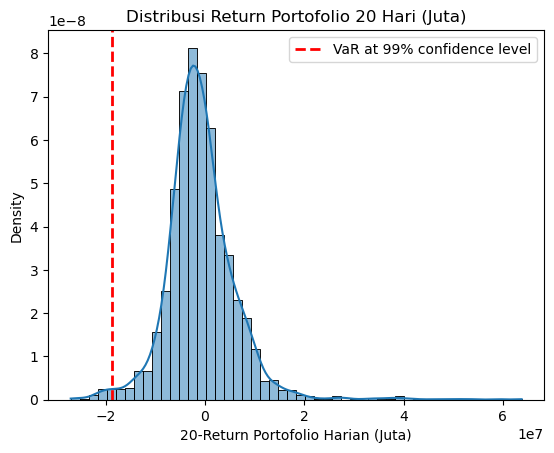

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_juta = range_returns * portfolio_value

sns.histplot(range_returns_juta.dropna(), bins=50, kde=True, stat='density')
plt.xlabel(f'{return_window}-Return Portofolio Harian (Juta)')
plt.ylabel('Density')
plt.title(f'Distribusi Return Portofolio {return_window} Hari (Juta)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()